<!-- WARNING: THIS FILE WAS AUTOGENERATED! DO NOT EDIT! -->

In [ ]:
from pylab import *
from pyndamics3 import Simulation

pyndamics3  version  0.0.31


## Logistic

Text(0, 9.5, 'initial $y=K$')

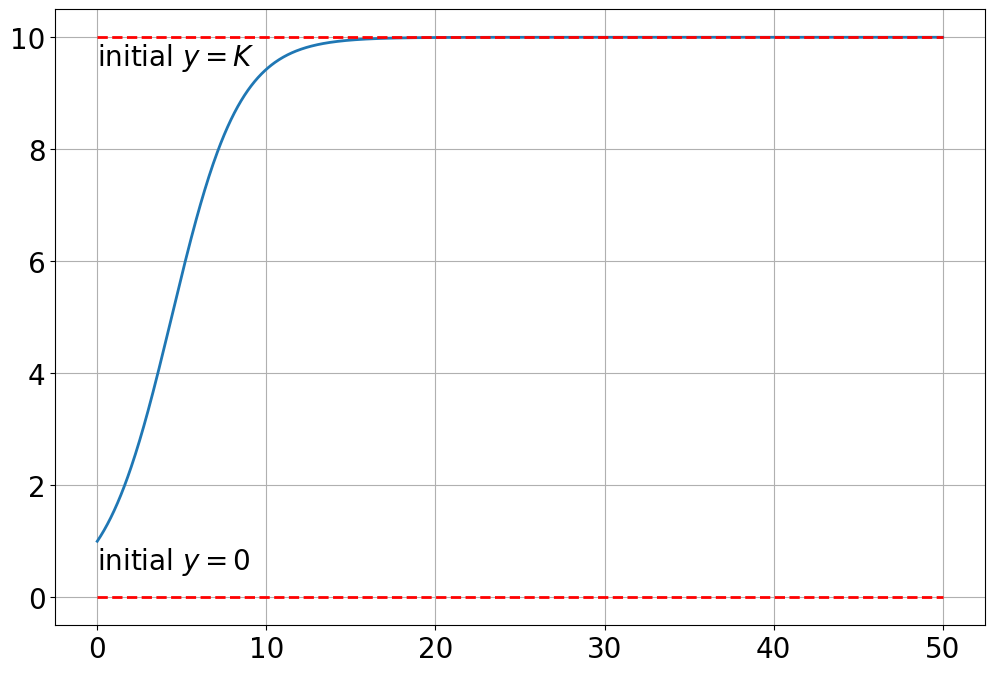

In [ ]:
K=10
sim=Simulation()
sim.add("y'=a*y*(1-y/K)",initial_value=1,plot=False)
sim.params(a=0.5,K=K)
sim.run(50)


plot(sim.t,sim.y)



sim=Simulation()
sim.add("y'=a*y*(1-y/K)",initial_value=0,plot=False)
sim.params(a=0.5,K=K)
sim.run(50)
plot(sim.t,sim.y,'r--')
text(0,0.5,'initial $y=0$')

sim=Simulation()
sim.add("y'=a*y*(1-y/K)",initial_value=K,plot=False)
sim.params(a=0.5,K=K)
sim.run(50)

plot(sim.t,sim.y,'r--')
text(0,9.5,'initial $y=K$')

$$
y'=ay(1-y/K)
$$

Stability, look at

$$
J\equiv \frac{\partial y'}{\partial y} = a - 2ay/K 
$$
evaluated at each fixed point, and see if it is positive (unstable) or negative (stable) or zero (neutral.

- 
$$
J|_{y=0}= a - 2a\cdot 0/K  = a
$$
which is greater than zero, so the $y=0$ fixed point is unstable.

- 
$$
J|_{y=K}= a - 2a\cdot K/K  = -a
$$
which is less than zero, so the $y=K$ fixed point is stable.

## Predator Prey

[<matplotlib.lines.Line2D>]

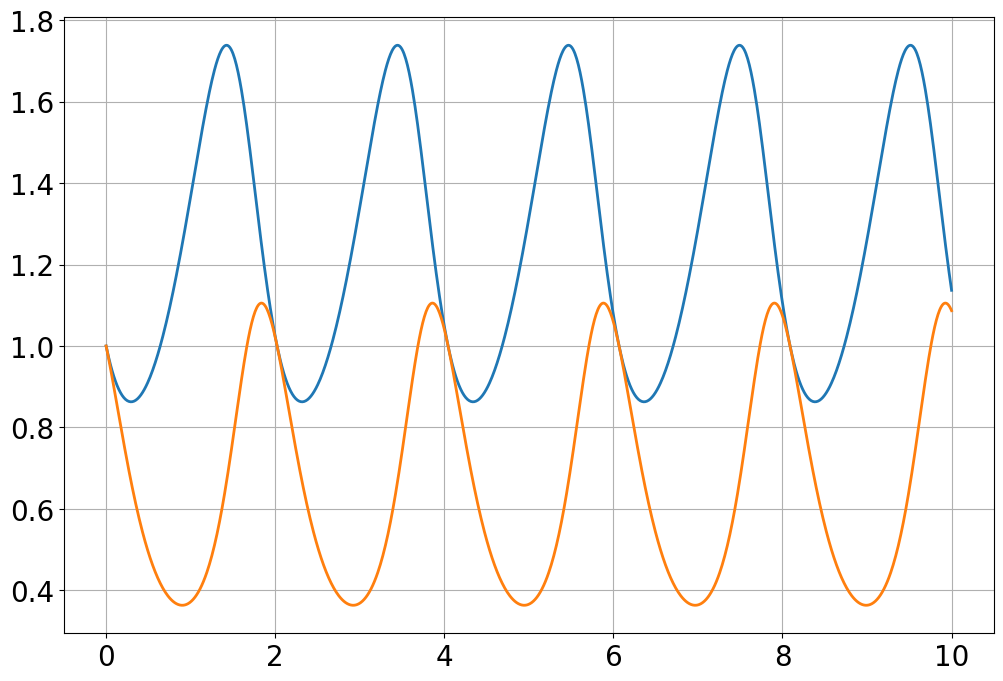

In [ ]:
sim=Simulation()
sim.add("x'=a*x -b*x*y",initial_value=1,plot=False)
sim.add("y'=+c*x*y - d*y",initial_value=1,plot=False)
sim.params(a=2,b=3,c=4,d=5)
sim.run(10)


plot(sim.t,sim.x)
plot(sim.t,sim.y)

Text(0, 1.3, 'initial $x=d/c,y=a/b$')

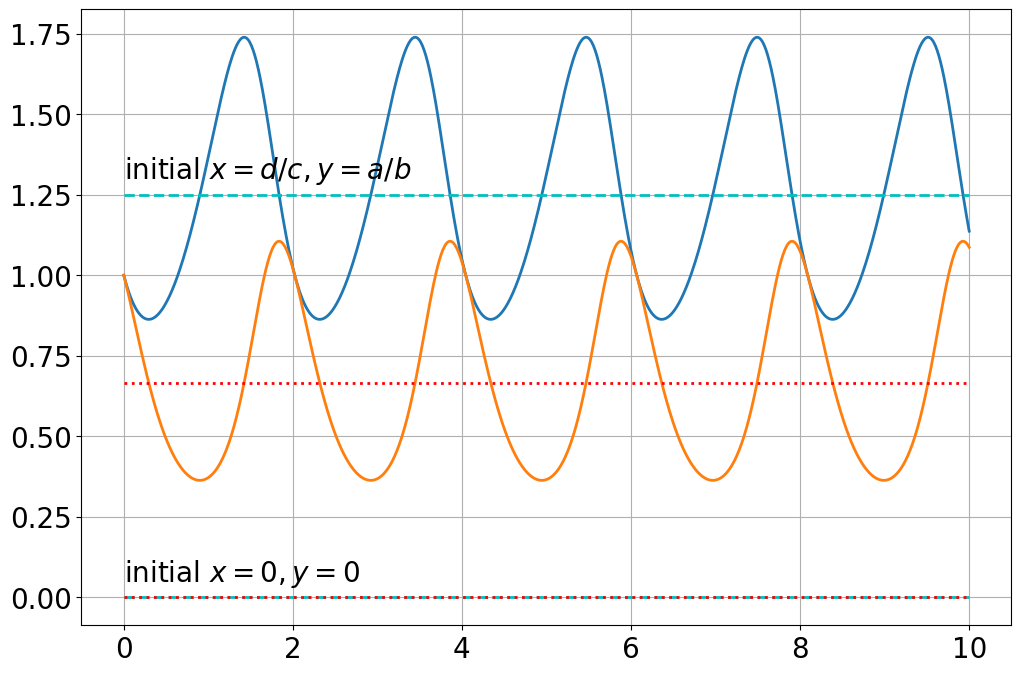

In [ ]:
a=2
b=3
c=4
d=5

sim=Simulation()
sim.add("x'=a*x -b*x*y",initial_value=1,plot=False)
sim.add("y'=+c*x*y - d*y",initial_value=1,plot=False)
sim.params(a=a,b=b,c=c,d=d)
sim.run(10)


plot(sim.t,sim.x)
plot(sim.t,sim.y)



sim=Simulation()
sim.add("x'=a*x -b*x*y",initial_value=0,plot=False)
sim.add("y'=+c*x*y - d*y",initial_value=0,plot=False)
sim.params(a=a,b=b,c=c,d=d)
sim.run(10)


plot(sim.t,sim.x,'c--')
plot(sim.t,sim.y,'r:')
text(0,0.05,'initial $x=0,y=0$')


sim=Simulation()
sim.add("x'=a*x -b*x*y",initial_value=d/c,plot=False)
sim.add("y'=+c*x*y - d*y",initial_value=a/b,plot=False)
sim.params(a=a,b=b,c=c,d=d)
sim.run(10)


plot(sim.t,sim.x,'c--')
plot(sim.t,sim.y,'r:')
text(0,1.3,'initial $x=d/c,y=a/b$')

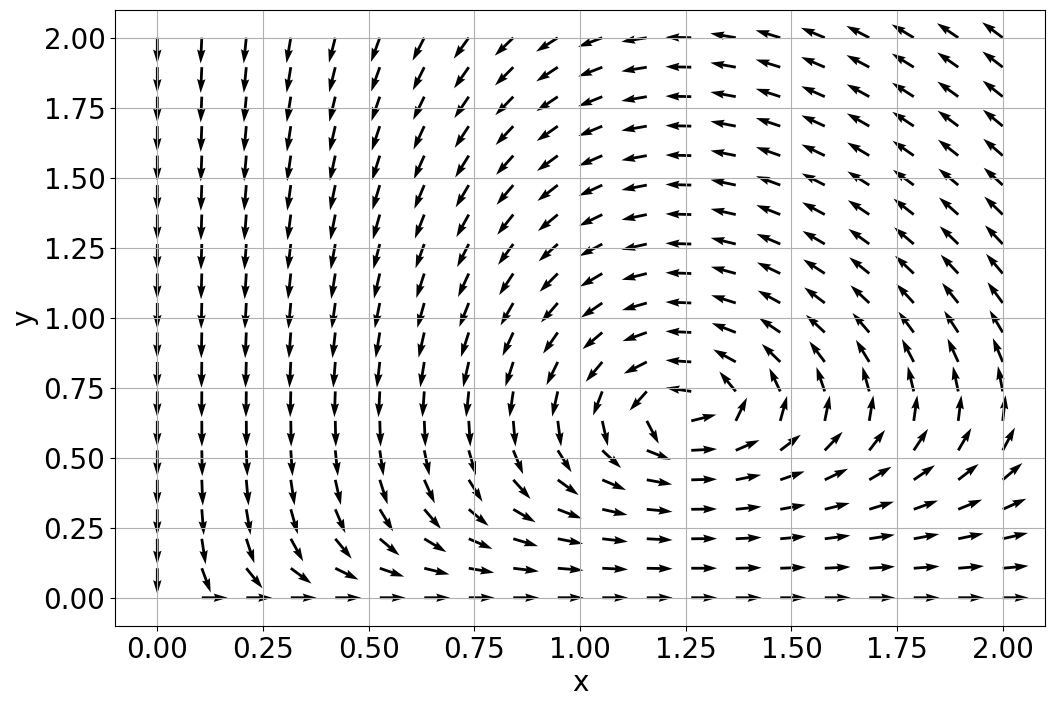

In [ ]:
vector_field(sim,rescale=True,x=linspace(0,2,20),y=linspace(0,2,20))

In [ ]:
import sympy as sp
import numpy as np
x,y=sp.symbols('x,y', real=True,positive=True)
a,b,c,d=sp.symbols('a,b,c,d', real=True,positive=True)

In [ ]:
f1=a*x - b*x*y
f2=c*x*y - d*y
f1x=sp.diff(f1,x)
f1y=sp.diff(f1,y)
f2x=sp.diff(f2,x)
f2y=sp.diff(f2,y)

In [ ]:
J=sp.Matrix([[f1x,f1y],[f2x,f2y]])
J

Matrix([
[a - b*y,    -b*x],
[    c*y, c*x - d]])

In [ ]:
J1=J.subs({x:0,y:0})
J1

Matrix([
[a,  0],
[0, -d]])

In [ ]:
J2=J.subs({x:d/c,y:a/b})
J2

Matrix([
[    0, -b*d/c],
[a*c/b,      0]])

In [ ]:
J2.eigenvals()

{-I*sqrt(a)*sqrt(d): 1, I*sqrt(a)*sqrt(d): 1}

In [ ]:
J2.diagonalize()

(Matrix([
 [-I*b*sqrt(d)/(sqrt(a)*c), I*b*sqrt(d)/(sqrt(a)*c)],
 [                       1,                       1]]),
 Matrix([
 [-I*sqrt(a)*sqrt(d),                 0],
 [                 0, I*sqrt(a)*sqrt(d)]]))

## Random System

From https://math.libretexts.org/Bookshelves/Differential_Equations/A_First_Course_in_Differential_Equations_for_Scientists_and_Engineers_(Herman)/07%3A_Nonlinear_Systems/7.05%3A_The_Stability_of_Fixed_Points_in_Nonlinear_Systems


$$
x'=-2x -3xy
$$

$$
y'=3y-y^2
$$

 

[<matplotlib.lines.Line2D>]

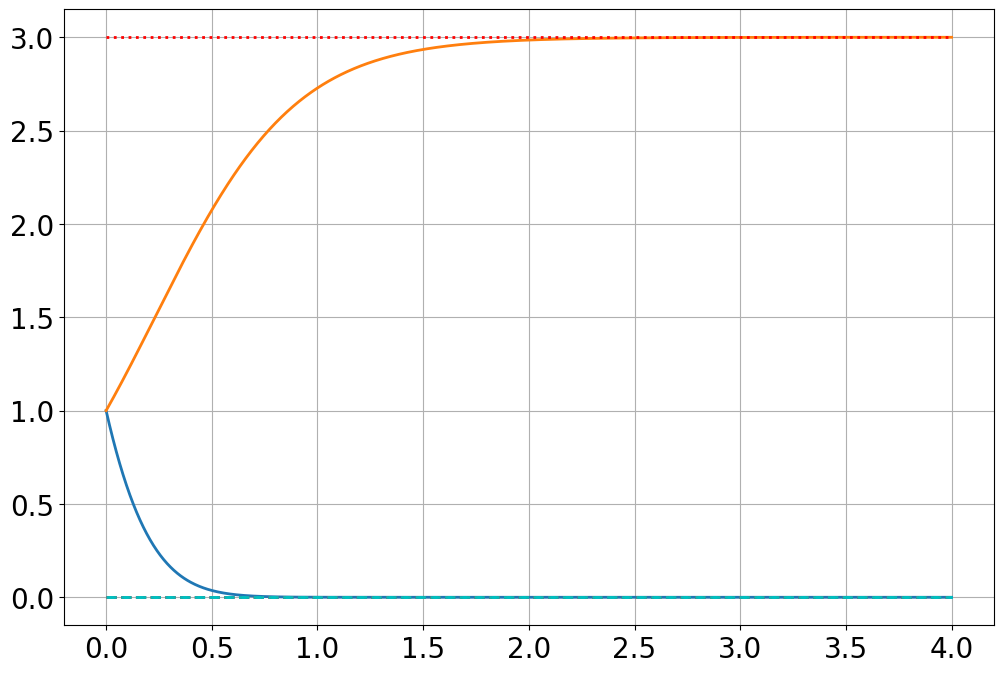

In [ ]:
sim=Simulation()
sim.add("x'=-2*x -3*x*y",initial_value=1,plot=False)
sim.add("y'=3*y - y**2",initial_value=1,plot=False)
sim.run(4)

plot(sim.t,sim.x)
plot(sim.t,sim.y)

## FP are (0,0) and (0,3)

sim=Simulation()
sim.add("x'=-2*x -3*x*y",initial_value=0,plot=False)
sim.add("y'=3*y - y**2",initial_value=0,plot=False)
sim.run(4)

plot(sim.t,sim.x,'c--')
plot(sim.t,sim.y,'r:')


sim=Simulation()
sim.add("x'=-2*x -3*x*y",initial_value=0,plot=False)
sim.add("y'=3*y - y**2",initial_value=3,plot=False)
sim.run(4)

plot(sim.t,sim.x,'c--')
plot(sim.t,sim.y,'r:')

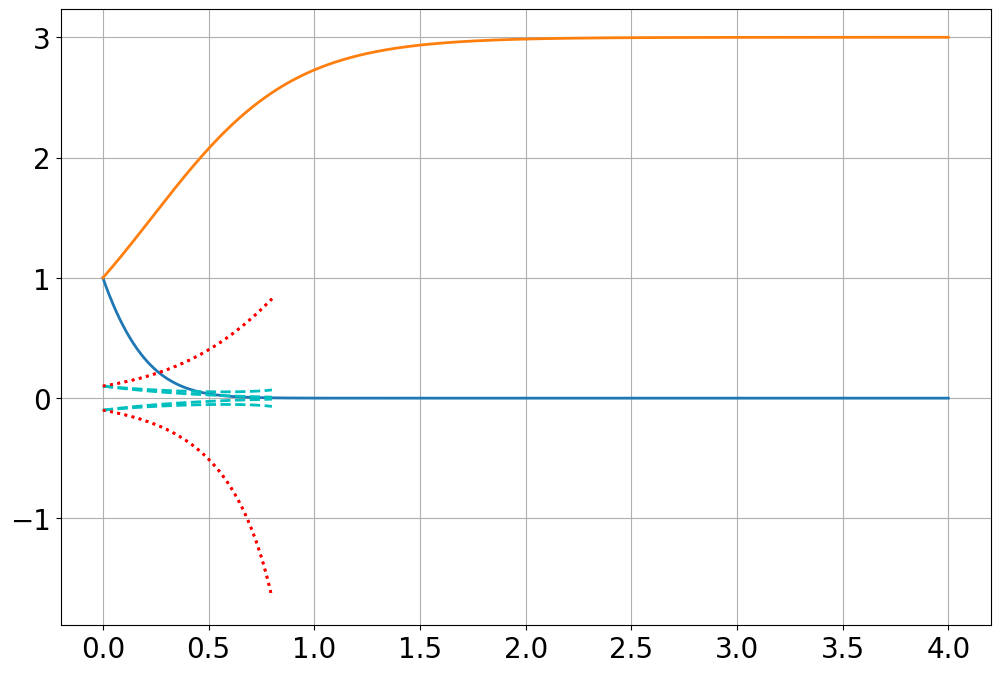

In [ ]:
sim=Simulation()
sim.add("x'=-2*x -3*x*y",initial_value=1,plot=False)
sim.add("y'=3*y - y**2",initial_value=1,plot=False)
sim.run(4)

plot(sim.t,sim.x)
plot(sim.t,sim.y)

## FP are (0,0) and (0,3)

FP=(0,0)
for dx in [-.1,.1]:
    for dy in [-.1,.1]:

        sim=Simulation()
        sim.add("x'=-2*x -3*x*y",initial_value=FP[0]+dx,plot=False)
        sim.add("y'=3*y - y**2",initial_value=FP[1]+dy,plot=False)
        sim.run(.8)

        plot(sim.t,sim.x,'c--')
        plot(sim.t,sim.y,'r:')

In [ ]:
from pyndamics3 import phase_plot

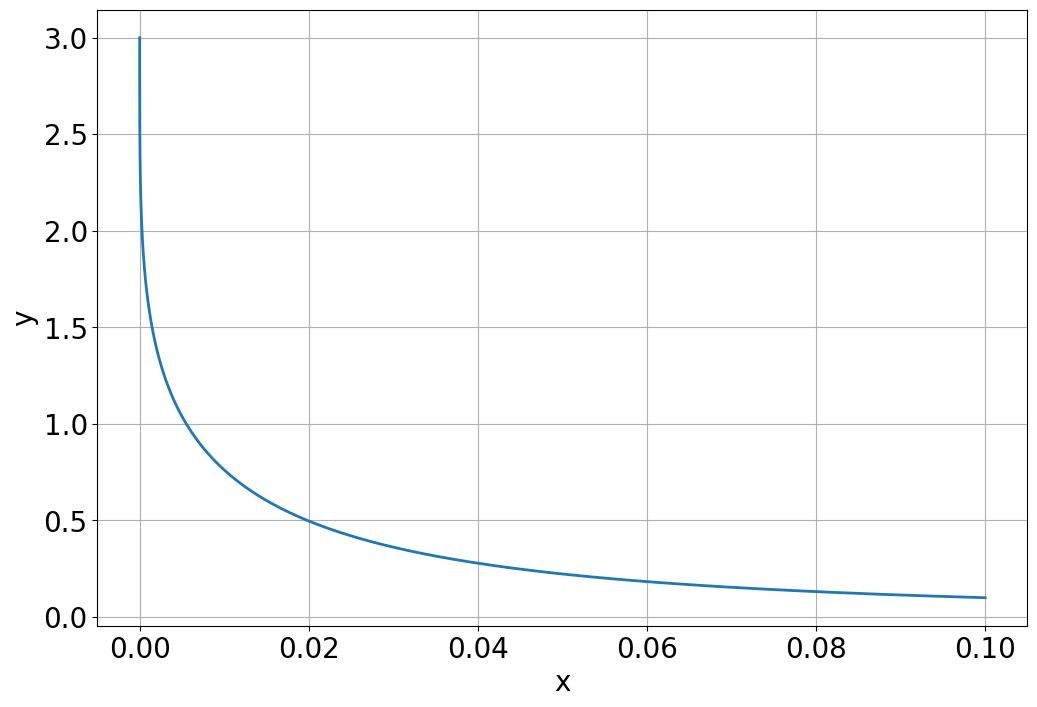

In [ ]:
sim=Simulation()
sim.add("x'=-2*x -3*x*y",initial_value=.1,plot=False)
sim.add("y'=3*y - y**2",initial_value=.1,plot=False)
sim.run(4)
phase_plot(sim,'x','y')

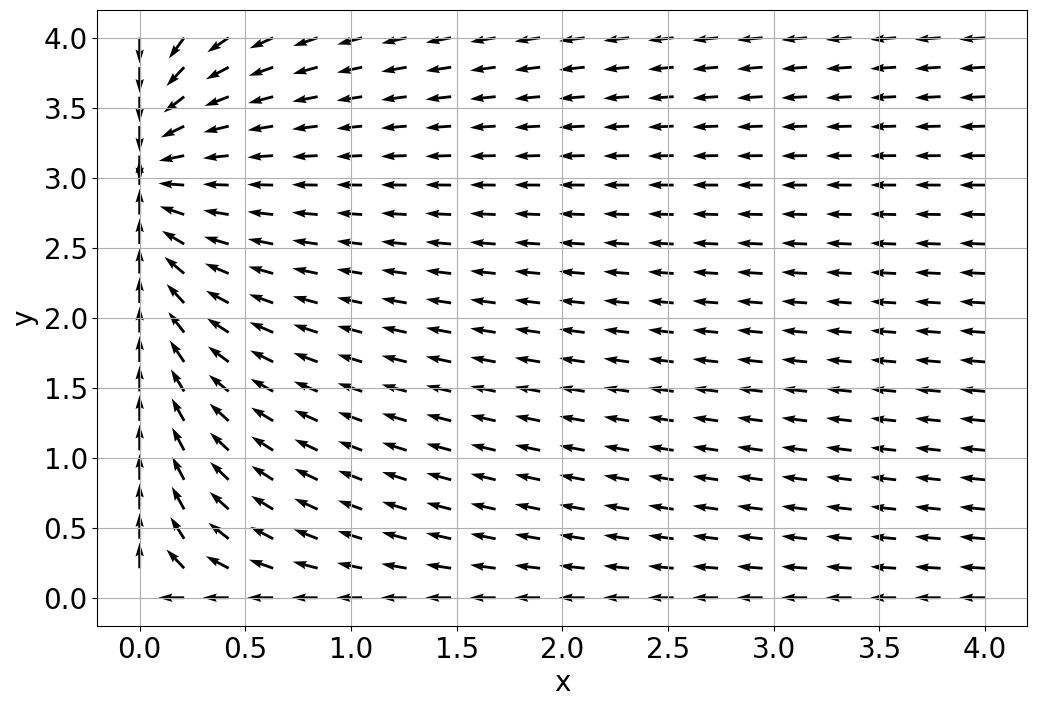

In [ ]:
vector_field(sim,rescale=True,x=linspace(0,4,20),y=linspace(0,4,20))